In [ ]:
import numpy as np
import cvxpy as cp

In [ ]:
#######
# DATA, do not change this part!
#######
a=[0.5, -0.5, 0.2, -0.7, 0.6, -0.2, 0.7, -0.5, 0.8, -0.4]
l=[40, 20, 40, 40, 20, 40, 30, 40, 30, 60]
Preq=np.arange(a[0],a[0]*(l[0]+0.5),a[0])
for i in range(1, len(l)):
    Preq=np.r_[ Preq, np.arange(Preq[-1]+a[i],Preq[-1]+a[i]*(l[i]+0.5),a[i]) ]

T = sum(l)

Peng_max = 20.0
Pmg_min = -6.0
Pmg_max = 6.0
eta = 0.1
gamma = 0.1
#####
# End of DATA part
#####

In [ ]:
Ebatt_max = 100

Peng = cp.Variable(T)
Pmg = cp.Variable(T)
Pbr = cp.Variable(T)
E = cp.Variable(T + 1)

constraints = [Preq == Peng + Pmg - Pbr,
               Peng >= 0,
               Peng <= Peng_max,
               Pmg >= Pmg_min,
               Pmg <= Pmg_max,
               0 <= Pbr,
               0 <= E,
               E <= Ebatt_max,
               E[0] == E[T]]

for t in range(T):
    constraints += [E[t+1] - E[t] + Pmg[t] <= eta*Pmg[t],
                    eta*Pmg[t] <= E[t] - E[t+1] - Pmg[t]]


objective = cp.sum(Peng + gamma*cp.square(Peng)) 

problem = cp.Problem(cp.Minimize(objective), constraints)
objective_value = problem.solve()
print(objective_value)


In [102]:
count = 0
for t in range(T):
    rhs = eta*Pmg[t].value
    lhs = E[t+1].value - E[t].value + Pmg[t].value
    right_diff = abs(rhs - lhs)
    left_diff = abs(-rhs - lhs)
    if right_diff > 0.05 and left_diff > 0.05:
        if right_diff < left_diff:
            count += 1
print(count)

65


In [95]:
count = 0
for t in range(T):
    rhs = eta*Pmg[t].value
    lhs = E[t+1].value - E[t].value + Pmg[t].value
    if abs(rhs - lhs) > 0.05 and abs(-rhs - lhs) > 0.05:
        count += 1
        if rhs > lhs:
            print(t)  
            print(rhs, lhs, "=", rhs - lhs)
print(count)

125
-0.012753338941759266 -0.07375873073037083 = 0.061005391788611564
126
-0.05707493305041177 -0.40290147247352215 = 0.34582653942311037
127
-0.09285739050529163 -0.5775689264703103 = 0.4847115359650187
128
-0.05996858356796686 -0.6698458128602695 = 0.6098772292923026
129
-0.04747670164429427 -0.6075763177136302 = 0.5600996160693359
130
-0.0438823774081503 -0.5674832913847081 = 0.5236009139765578
131
-0.04901522011768585 -0.522555936572578 = 0.4735407164548922
132
-0.057120192911761805 -0.5594211827506435 = 0.5023009898388816
133
-0.06640152798760758 -0.6512591171748601 = 0.5848575891872525
134
-0.0760223214809839 -0.7582415654833946 = 0.6822192440024107
135
-0.08572620365311383 -0.8670403074440749 = 0.7813141037909611
136
-0.09507403017705396 -0.9753870527084167 = 0.8803130225313628
137
-0.10367191760478339 -1.0777075792363562 = 0.9740356616315728
138
-0.11142734806010005 -1.1603979982238581 = 1.0489706501637581
139
-0.12084666053247178 -1.206884413357732 = 1.0860377528252603
140
-0.

In [ ]:
retval = {}

retval['Peng'] = list(Peng.value)
retval['Pmg'] = list(Pmg.value)
retval['Pbr'] = list(Pbr.value)
retval['E'] = list(E.value)


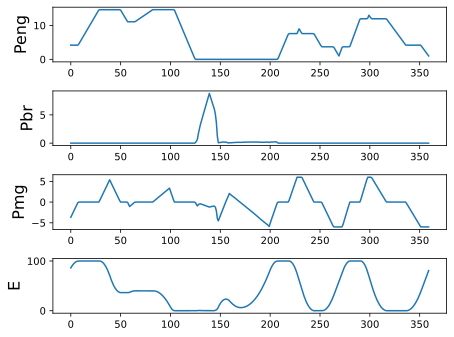

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()
# Plot P_eng.
ax = f.add_subplot(411)
plt.plot(Peng[:].value.round(3))
plt.ylabel(r"Peng", fontsize=16)

# Plot P_br.
plt.subplot(4,1,2)
x1 = Pbr[:].value.round(3)
plt.plot(x1)
plt.ylabel(r"Pbr", fontsize=16)

# Plot P_mg.
plt.subplot(4,1,3)
plt.plot(Pmg[:].value.round(3))
plt.ylabel(r"Pmg", fontsize=16)

# Plot E
plt.subplot(4,1,4)
x2 = E[:360].value.round(3)
plt.plot(range(360), x2)
plt.ylabel(r"E", fontsize=16)
plt.tight_layout()

plt.show()

In [ ]:
count = 0
for t in range(T):
    if ((-E.value[t] + Pmg.value[t] + E.value[t+1]) - eta*Pmg.value[t]) > 0.0003 :
        count += 1
print(count)

In [ ]:
diff = (abs(5077.526349321675-objective_value))
print(diff)